AIM : Classification of IRIS data using Support Vector Machine.
Task: Use the different kernels and check the effect of the kernel.

ID NO. : 21CE045

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
import numpy as np
import np_utils

In [2]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species'] = iris.target
X = iris.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y1 = encoder.fit_transform(Y)
Y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", Y_train.shape)
print("y_test.shape: ", Y_test.shape)

X_train.shape:  (120, 4)
X_test.shape:  (30, 4)
y_train.shape:  (120, 3)
y_test.shape:  (30, 3)


In [7]:
import seaborn as sns

c:\Users\91834\.conda\envs\ML_CLub\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


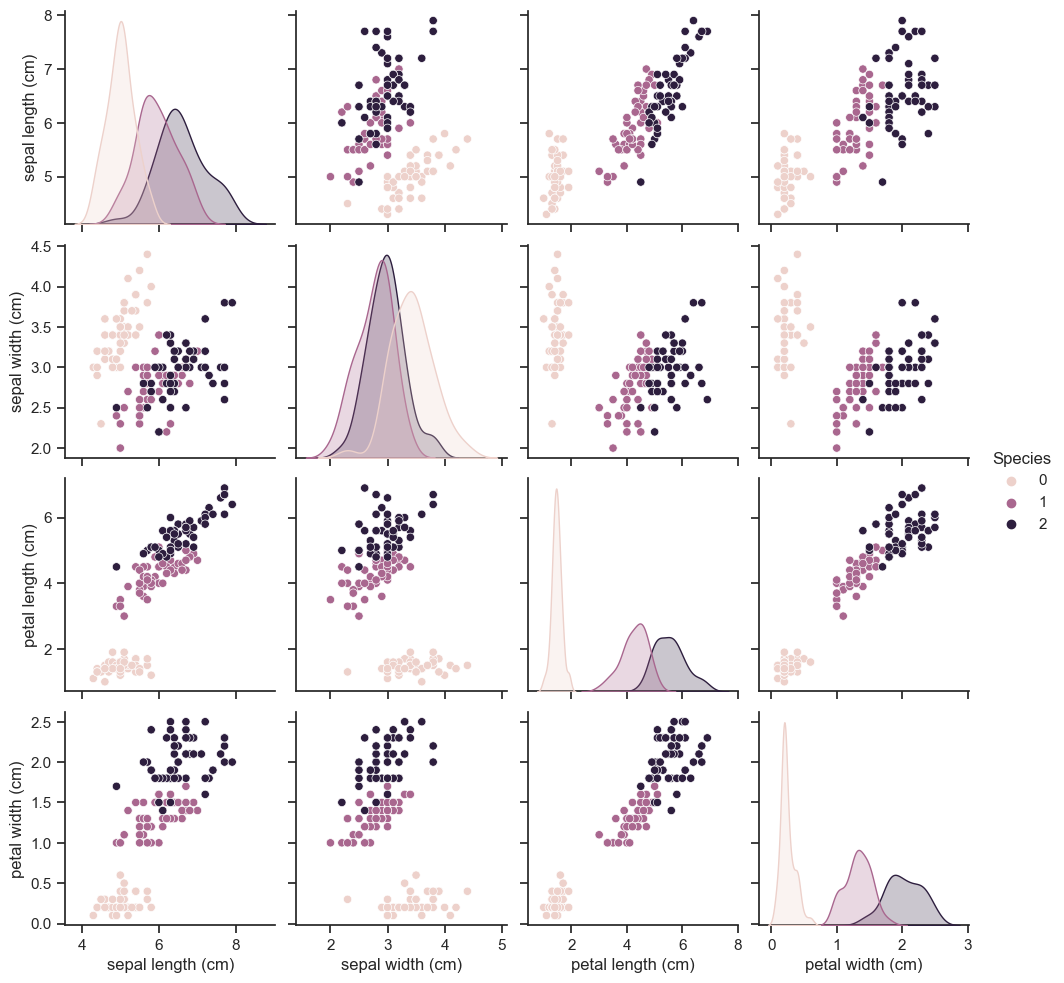

In [8]:
sns.set(style='ticks')
sns.set_palette('husl')
sns.pairplot(df.iloc[:,0:5], hue='Species')

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 53 (212.00 Byte)
Trainable params: 53 (212.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
print(model.get_weights())

[array([[ 0.7581723 , -0.7296642 ,  0.28562212],
       [-0.9070353 ,  0.73207545,  0.8317827 ],
       [-0.90118194, -0.15138024, -0.5387801 ],
       [-0.05002797,  0.8933724 , -0.6600522 ]], dtype=float32), array([0., 0., 0.], dtype=float32), array([[-0.07793993, -0.03530705,  0.60583895,  0.04915172,  0.5521266 ],
       [-0.41481158,  0.6236897 , -0.27438956,  0.57790536, -0.49675447],
       [-0.0271917 , -0.6816695 ,  0.56436723,  0.58888024, -0.85273576]],
      dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32), array([[-0.473256  , -0.7662002 , -0.7736348 ],
       [ 0.5398949 ,  0.04645556,  0.79424256],
       [-0.55145323, -0.8583075 , -0.35241604],
       [ 0.8036997 , -0.8123578 , -0.3544013 ],
       [-0.7655818 , -0.7751538 ,  0.05381954]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [14]:
model.fit(X_train, Y_train, epochs=300, batch_size=8, verbose=0)

In [15]:
scores = model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 200ms/step - loss: 0.4766 - accuracy: 0.6333


In [16]:
print("Accuracy: %.2f%%"% (scores[1]*100))

Accuracy: 63.33%


In [17]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 94ms/step


In [18]:
X_test[1,:], y_pred[1]

(array([5.7, 3.8, 1.7, 0.3]),
 array([9.9999332e-01, 1.2099088e-06, 5.4598636e-06], dtype=float32))

In [19]:
y_pred_class = np.argmax(y_pred[1])

In [20]:
print(y_pred_class)

0


In [21]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(Y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))

1/1 [==============================] - 0s 29ms/step
[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



c:\Users\91834\.conda\envs\ML_CLub\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91834\.conda\envs\ML_CLub\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91834\.conda\envs\ML_CLub\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
y_test_class,y_pred_class

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0], dtype=int64),
 array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0], dtype=int64))